In [1]:
from torchvision import models
import prediction
import visualizer
import torch
import train
import model
import numpy as np
import csvLoader as cl
import visualizer as vs
import dataLoader as dl
import torch.nn as nn
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler

In [2]:
current_trained = './best_model.pt'
model_path = './best_model_fc_net.pt'
resnet_model_path = './best_model_resnet_50_0.6.pt'
TRAIN_CSV_PATH = 'facial-keypoints-detection/training/training.csv'
TEST_CSV_PATH = 'facial-keypoints-detection/test/test.csv'

In [3]:
test_csv = cl.load_csv(TEST_CSV_PATH)
csv_allValid, csv_autoFill, csv_missingOnly = cl.clean_csv(test_csv)

test_dataset = dl.FacialKptsDataSet(csv_allValid)
test_sampler =  SubsetRandomSampler(range(len(test_dataset)))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, sampler=test_sampler)

All Valid Shape - (1783, 2)
Auto Fill Shape - (1783, 2)
Missing Only Shape - (0, 2)
Size of Image Array - 1783


In [4]:
resnet50 = models.resnet50(num_classes=30)
resnet50.inplanes = 96
resnet50.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)

fc_net = model.FullyConnectedNet()

In [5]:
fc_model= prediction.loadModel(model_path, fc_net)
resnet_model = prediction.loadModel(resnet_model_path, resnet50)

Testing Set:
Red o for fc net and green x for resnet: 


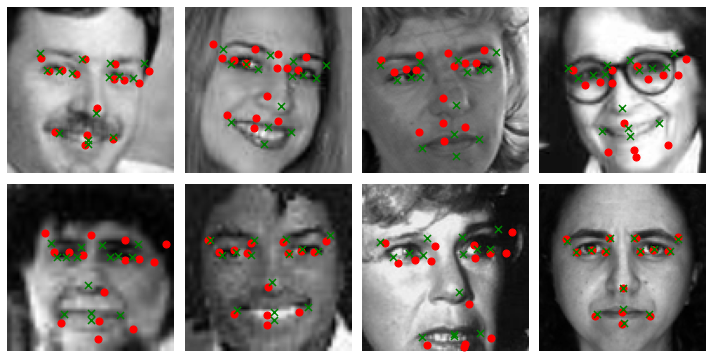

tensor([[63.9203, 39.5521, 29.2504, 36.1708, 58.3717, 39.9420, 71.8165, 40.5768,
         37.0884, 37.6907, 22.3695, 36.0832, 58.9307, 31.9545, 78.4291, 31.6229,
         42.3840, 29.6111, 18.3824, 26.0055, 50.9311, 60.4144, 60.2446, 74.5332,
         29.3208, 72.0786, 46.0172, 76.2459, 45.8078, 78.6378],
        [67.9260, 38.7621, 34.6968, 32.4647, 61.3662, 39.0785, 75.0398, 40.6525,
         41.9773, 35.1842, 26.4888, 32.0832, 61.9059, 30.8269, 81.2594, 32.9856,
         48.9667, 27.3393, 21.7990, 23.6110, 54.9073, 56.4993, 61.0328, 71.4724,
         26.2213, 65.9704, 47.4278, 68.6723, 45.1020, 78.3147],
        [67.7975, 35.7018, 27.8879, 39.9407, 59.8993, 37.1422, 72.4259, 35.5035,
         32.8596, 39.6903, 19.5481, 41.8770, 55.0221, 30.0508, 77.0206, 25.6813,
         33.2413, 30.9819,  9.8958, 33.1523, 53.7724, 56.1391, 67.0239, 75.7851,
         34.4637, 80.5204, 52.6346, 72.8105, 53.5841, 85.3549],
        [64.4164, 34.7482, 30.6537, 38.8990, 56.8882, 36.0957, 72.4446, 34.1701

In [15]:
image, _ = next(iter(test_loader))
pred = prediction.predict(fc_model, image, None, vis=False)
print('Testing Set:\nRed o for fc net and green x for resnet: ')
prediction.predict(resnet_model, image, None, comp_kpts=pred)
# Red o for fc net and green x for resnet

In [7]:
TRAIN_CSV_PATH = 'facial-keypoints-detection/training/training.csv'
TEST_CSV_PATH = 'facial-keypoints-detection/test/test.csv'

USE_GPU, device = train.check_GPU()
print('GPU mode: {}'.format(USE_GPU))

train_csv = cl.load_csv(TRAIN_CSV_PATH)

print(f'Len of train csv: {len(np.array(train_csv.Image))}')
csv_allValidTrain, csv_autoFillTrain, _ = cl.clean_csv(train_csv)

print('Loading Dataset...')
train_dataset = dl.FacialKptsDataSet(csv_autoFillTrain)

_, autoFillVal = dl.getTrainValidationDataSet(csv_autoFillTrain, 0.85)
print('Loading validation set...')
val_dataset = dl.FacialKptsDataSet(autoFillVal)

# Init sampler and loader
val_sampler = SubsetRandomSampler(range(len(val_dataset)))
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=8, sampler=val_sampler)

GPU mode: True
Len of train csv: 7049
All Valid Shape - (2140, 31)
Auto Fill Shape - (7049, 31)
Missing Only Shape - (4909, 31)
Loading Dataset...
Size of Image Array - 7049
Loading validation set...
Size of Image Array - 1058


Auto Filled Validation Set:
Resnet Predictions: 


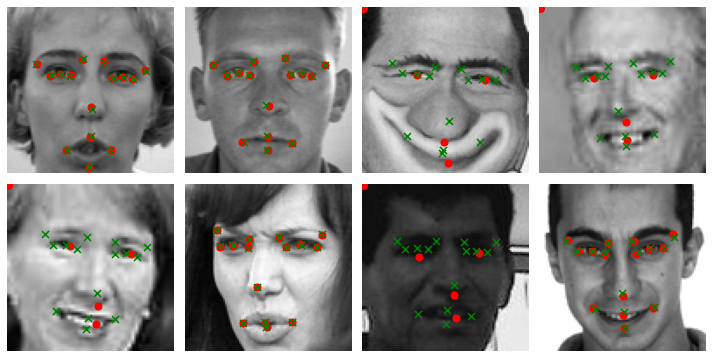

FC Net Predictions: 


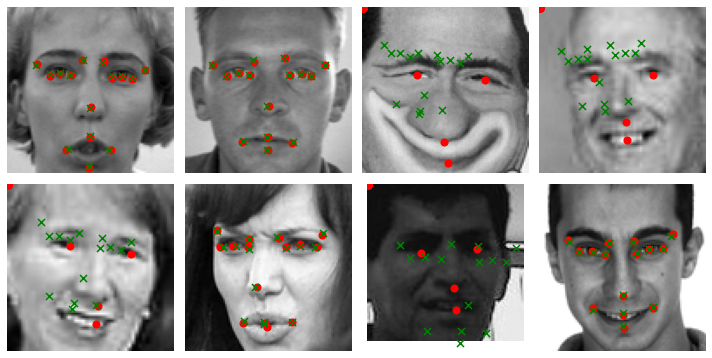

tensor([[65.6370, 39.0515, 30.1017, 37.6857, 59.7706, 39.4794, 71.4057, 40.3692,
         35.6998, 38.6726, 24.1195, 38.3396, 54.3386, 31.0616, 79.0279, 35.9736,
         42.9445, 29.7745, 15.8720, 32.9972, 47.5173, 57.8193, 58.3885, 82.0661,
         34.7507, 81.3687, 47.2996, 73.8270, 46.8829, 91.4223],
        [66.8161, 37.9628, 30.3481, 37.7325, 59.8804, 38.6785, 72.6941, 39.3265,
         36.9729, 38.5766, 23.6611, 39.2588, 56.9755, 28.9763, 80.6953, 33.0738,
         38.8582, 30.3092, 15.5197, 33.2127, 47.0817, 56.7387, 61.9137, 77.4552,
         33.1635, 76.6329, 47.3141, 74.2164, 47.1329, 81.9927],
        [50.3495, 29.9283, 21.6115, 26.2628, 44.8042, 30.4055, 56.3669, 31.5557,
         27.2844, 28.4396, 16.0841, 25.8812, 42.9384, 27.4603, 60.7081, 27.7530,
         31.9847, 26.0805, 12.0762, 21.1515, 35.5863, 50.4817, 45.8926, 58.9374,
         19.2399, 55.3402, 33.1046, 59.2728, 32.3542, 61.0941],
        [48.7514, 26.1099, 22.0649, 29.3601, 43.2451, 27.3066, 54.7785, 26.1227

In [12]:
print('Auto Filled Validation Set:')
image, kpts = next(iter(val_loader))

print('Resnet Predictions: ')
prediction.predict(resnet_model, image, kpts)

print('FC Net Predictions: ')
prediction.predict(fc_model, image, kpts)

In [9]:
# All Valid
_, allValidVal = dl.getTrainValidationDataSet(csv_allValidTrain, 0.85)
print('Loading validation set...')
val_allValid_dataset = dl.FacialKptsDataSet(allValidVal)

# Init sampler and loader
val_allValid_sampler = SubsetRandomSampler(range(len(val_allValid_dataset)))
val_allValid_loader = torch.utils.data.DataLoader(val_allValid_dataset, batch_size=8, sampler=val_allValid_sampler)

Loading validation set...
Size of Image Array - 321


All Valid Set:
Resnet Predictions: 


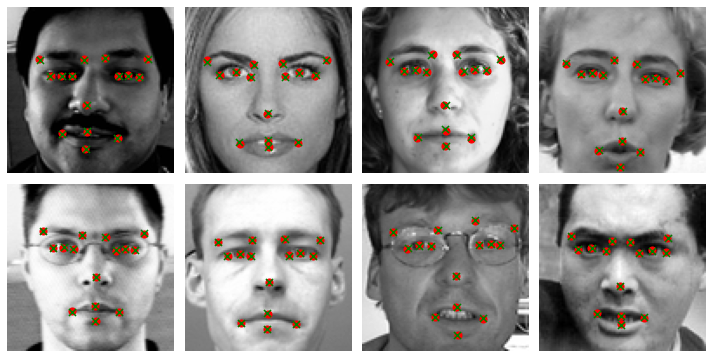

FC Net Predictions: 


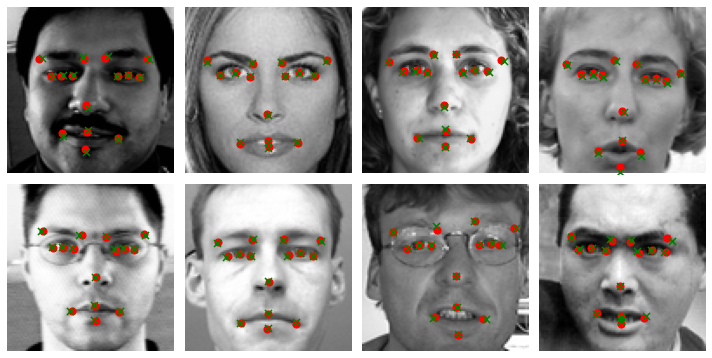

tensor([[69.0627, 38.5110, 31.4528, 38.5640, 62.8432, 39.0445, 76.0254, 39.7939,
         37.5605, 38.9065, 25.0623, 39.0917, 57.4124, 27.8351, 81.2277, 29.2946,
         43.0832, 28.5648, 19.6222, 28.7748, 46.3002, 57.4481, 63.2590, 75.8360,
         31.4643, 73.6908, 45.8213, 70.4343, 45.1871, 82.9760],
        [65.3635, 37.3864, 28.7605, 37.3458, 57.2540, 39.4153, 74.2101, 38.8111,
         36.9832, 39.4518, 19.8305, 38.6827, 55.0437, 31.3340, 81.3346, 30.4639,
         38.2632, 31.5289, 12.7247, 31.1221, 47.6338, 61.5919, 64.4893, 77.1150,
         31.2776, 77.1234, 47.5305, 77.2155, 47.8351, 80.9220],
        [65.0269, 35.7349, 29.9665, 36.3291, 57.6566, 37.2840, 72.6300, 36.7412,
         37.1494, 37.3216, 22.8318, 37.2125, 53.8455, 26.8060, 81.4276, 30.5512,
         40.9641, 27.1427, 14.4341, 31.0796, 46.8988, 57.0414, 62.0030, 74.9637,
         32.5268, 74.7490, 47.3322, 69.8817, 47.6116, 80.1800],
        [67.0846, 41.5773, 30.5036, 38.8123, 60.8382, 41.8289, 73.2304, 43.2072

In [13]:
print('All Valid Set:')
image, kpts = next(iter(val_allValid_loader))
print('Resnet Predictions: ')
prediction.predict(resnet_model, image, kpts)

print('FC Net Predictions: ')
prediction.predict(fc_model, image, kpts)